In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

from importlib.machinery import SourceFileLoader
u=SourceFileLoader('u','/home/marco/work/tesi/BEGepro/scripts/utils.py').load_module()

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca

import peakutils as pu
from scipy.signal import savgol_filter

In [2]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
coll=ca.NPYreader(filename,True).get_event()

In [3]:
coll1=coll.subset('ae',0,1.6e-2)
curr1=coll1.get_curr()
coll2=coll.subset('ae',1.6e-2)
curr2=coll2.get_curr()

<IPython.core.display.Javascript object>


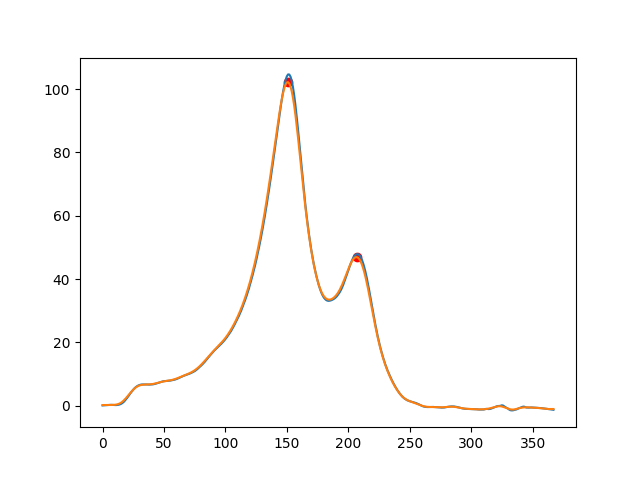

n peaks computed 2


<IPython.core.display.Javascript object>


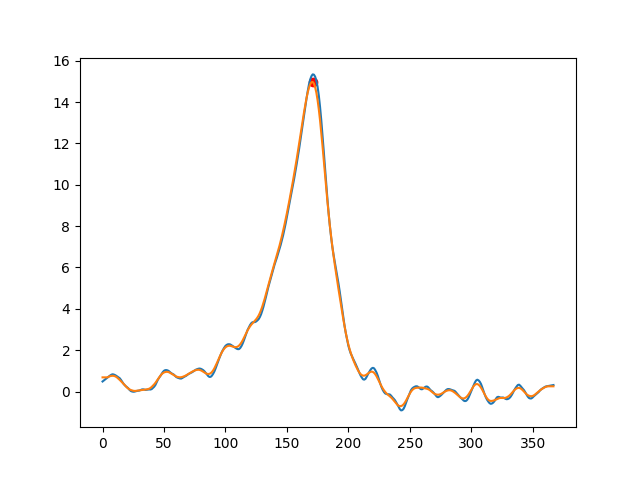

n peaks computed 1


In [4]:
#MSE
plt.figure()
i=0
plt.plot(curr1[i])

#reproducing what the peak finder does

f=savgol_filter(curr1[i],10,0)
plt.plot(f)
indexes=u.n_peaks().compute_n_peaks(curr1[i])
print('n peaks computed '+str(len(indexes)))
plt.scatter(indexes,f[indexes],marker='o',color='r')

#SSE
plt.figure()
plt.plot(curr2[i])
f=savgol_filter(curr2[i],10,0)
plt.plot(f)
indexes=u.n_peaks().compute_n_peaks(curr2[i])
print('n peaks computed '+str(len(indexes)))
plt.scatter(indexes,f[indexes],marker='o',color='r')

<IPython.core.display.Javascript object>


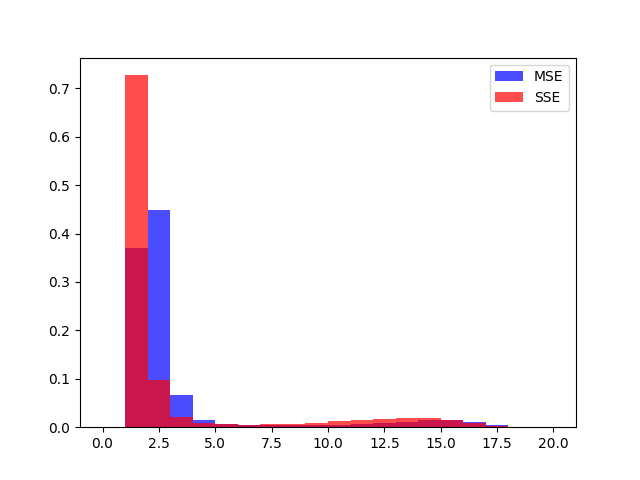

<IPython.core.display.Javascript object>


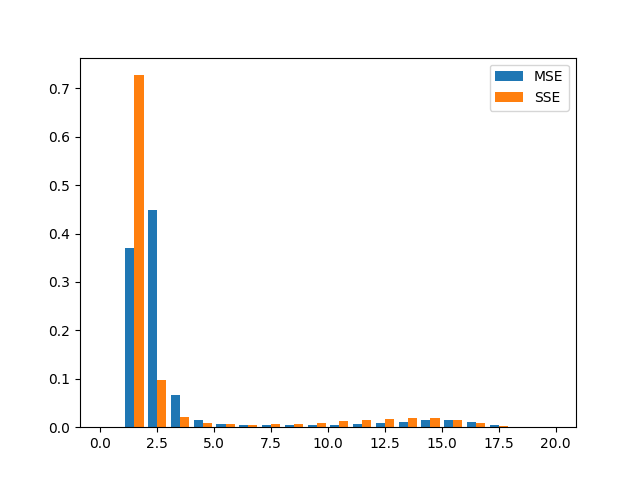

In [5]:
#Distribution of the events
n1=coll1.get_n_peaks()
n2=coll2.get_n_peaks()
plt.figure()
bins=np.linspace(0,20,21)
plt.hist(n1,color='b',alpha=0.7,bins=bins,density=True,label='MSE')
plt.hist(n2,color='r',alpha=0.7,bins=bins,density=True,label='SSE')
plt.legend()

#Same plot 
plt.figure()
plt.hist([n1,n2],bins=bins,density=True,label=['MSE','SSE'])
plt.legend()

<IPython.core.display.Javascript object>


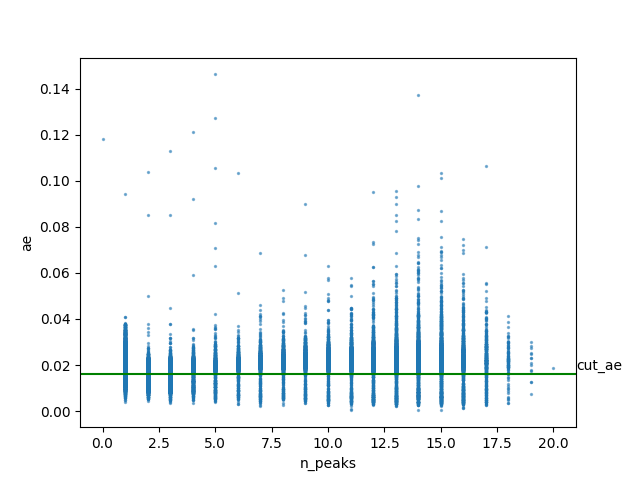

Text(21, 0.018, 'cut_ae')

In [22]:
#Scatter plot
plt.figure()
plt.scatter(coll.get_n_peaks(),coll.get_avse(),s=2,alpha=0.5)
plt.show()

plt.axhline(1.6e-2, color='g')
plt.xlabel('n_peaks')
plt.ylabel('ae')

plt.annotate('cut_ae',(21,1.8e-2))